# **Segmentation and behavioral analysis of customers.**

In [ ]:
#import all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#load the datase
df=pd.read_excel('Online Retail.xlsx')
df[:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

we have 541909 rows and 8 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


most of the columns of our dataset are categorical.


# Checking null values

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

we found null values in the description and customerid column.i have removed null values for further analysis.

# Duplicacy check

In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df=df.drop_duplicates()#removes the duplicate row
df.shape

(536641, 8)

I have removed  these duplicated rows as it would affect performance, take up extra storage, and make calculations complicated as well

 # Analyzing the unique values of columns

In [ ]:
#exporing unique values of column
print("unique values of Quantity column:",df['Quantity'].nunique())
print("unique values of Description column:",df['Description'].nunique())
print("unique values of InvoiceNo column:",df['InvoiceNo'].nunique())
print("unique values of StockCode column:",df['StockCode'].nunique())
print("unique values of InvoiceDate column:",df['InvoiceDate'].nunique())
print("unique values of UnitPrice column:",df['UnitPrice'].nunique())
print("unique values of CustomerID column:",df['CustomerID'].nunique())
print("unique values of Country column:",df['Country'].nunique())


unique values of Quantity column: 722
unique values of Description column: 4223
unique values of InvoiceNo column: 25900
unique values of StockCode column: 4070
unique values of InvoiceDate column: 23260
unique values of UnitPrice column: 1630
unique values of CustomerID column: 4372
unique values of Country column: 38


# Exploring null customer id

In [ ]:
df['CustomerID'].isnull().sum()

135037

Our aim is to segment the customers and analyze their behaviors so that it will help us make future decisions.<br>
customerid column is important so as we can trace customer by their id. Each customer carries unique id.<br>
If customers have no id then we can't trace them so i have removed the empty customerid.

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'].isnull().sum()

0

# Analyze the statistical status of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


# Find out the cancelled order

InvoiceNo stats with C denotes cancellation of order.let's find out the cancel order rows.

In [ ]:
cancel=df[df['InvoiceNo'].astype(str).str.contains('C')].index
cancel


Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=8872)

total 8872 orders have been cancelled and quantity is represented by negative sign as these are return product.

In [ ]:
df=df.drop(cancel)


In [ ]:
df.shape

(392732, 8)

# Feature Engineering

if we have per products price and quantity then we can easily calculate the total amount of sales.<br>
<br>
here, we have Quantity column and UnitPrice	 column.<br><br> 
now we can generate a new column namely->total_price by multiplying Quantity and UnitPrice column

In [ ]:
df['total_price']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


total_prize represents the total amount of sales for per transaction

 # Generating month and year column from InvoiceDate column

We can get new features from the InvoiceDate column, as it carries date and time information together.

In [ ]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df[:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12


Text(0.5, 1.0, 'fig-2:bar chart of Total sales in months')

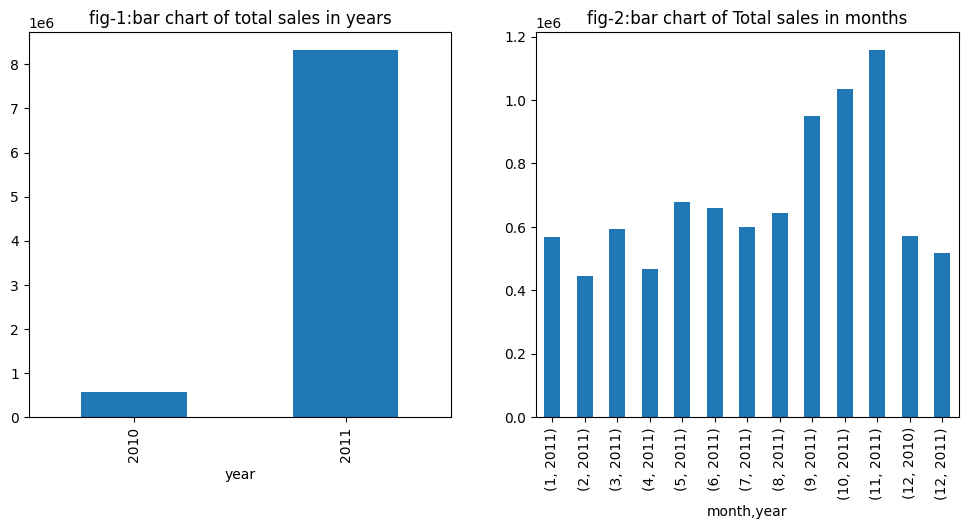

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df.groupby('year')['total_price'].sum().plot(kind='bar')
plt.title("fig-1:bar chart of total sales in years")


plt.subplot(1,2,2)
df.groupby(['month','year'])['total_price'].sum().plot(kind='bar')
plt.title("fig-2:bar chart of Total sales in months")


# fig-1:
We have found most of the total sales in 2011. <br>
# fig-2:
In 2010, the total sales is low as the sales occured only in december.
<br>
November, October, and September are the highest total sales months, respectively.<br>
In 2011,total sales increased in the last few months(sep,oct,nov) but suddently dropped in Decmber.<br>


# Grouping top 5 sales country

In [ ]:
country_sales=df.groupby('Country')['total_price'].sum().sort_values(ascending=False)
customer_num=df.groupby('Country')['CustomerID'].count().sort_values(ascending=False)


Text(0.5, 1.0, 'least sales')

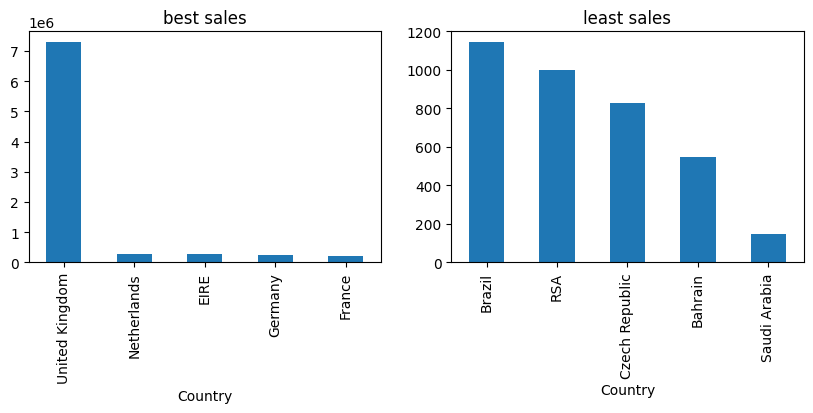

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
country_sales[:5].plot(kind='bar')
plt.title("best sales")


plt.subplot(1,2,2)
country_sales.tail(5).plot(kind='bar')
plt.title("least sales")



Text(0.5, 1.0, 'least customer')

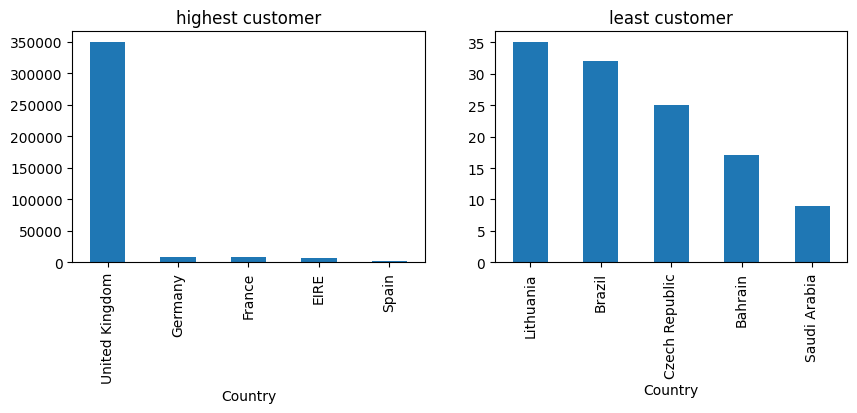

In [ ]:
#customer number check
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
customer_num[:5].plot(kind='bar')
plt.title("highest customer")


plt.subplot(1,2,2)
customer_num.tail(5).plot(kind='bar')
plt.title("least customer")

From the plot, we can conclude that the UK is the country with the highest sales and customers, and Saudi Arabia has the lowest sales and customers. Comparing these four figures,we can infer that the total sales depended on the customer number in most of the cases.

We have now limited our further analysis to the United Kingdom because it is a better option for sales. Then, in the future, if we need to do more analysis on more countries, they can just be added to the dataframe.

In [ ]:
uk = df[df.Country=='United Kingdom']
uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   total_price  349227 non-null  float64       
 9   year         349227 non-null  int64         
 10  month        349227 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 32.0+ MB


In [ ]:
uk.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,349227.0,12.181295,191.797470,1.0,2.00,4.00,12.00,80995.00
UnitPrice,349227.0,2.972124,17.990307,0.0,1.25,1.95,3.75,8142.75
CustomerID,349227.0,15548.333625,1594.403077,12346.0,14191.00,15518.00,16931.00,18287.00
total_price,349227.0,20.860428,328.406035,0.0,4.20,10.20,17.85,168469.60
year,349227.0,2010.932826,0.250324,2010.0,2011.00,2011.00,2011.00,2011.00
month,349227.0,7.635163,3.416509,1.0,5.00,9.00,11.00,12.00


In [ ]:
uk = uk[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','total_price']]
uk

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,total_price
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


# RFM Analysis

R:  Recency-> how recent made purchase or last purchase<br>
F:  Frequency->how many often/times purchase<br>
M:  Monetary->how muuch money spend for last purchase

In [ ]:

#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMscores = uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_price': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)



In [ ]:
rfm = RFMscores.rename(columns={'InvoiceDate': 'recency',
            'InvoiceNo': 'frequency',
            'total_price': 'monetary'
            })
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


to make our analysis easier convert all the datatype to integer

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)

rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4413,33053
12749.0,3,199,4090
12820.0,3,59,942


the low score of recency represents the customer has made recent purchase.the higher score means lower/late recency <br>
<br>
the max number of Frequency and Monetary scores mean that the customer is purchasing frequently and spending more money, so the highest score (5) should be given to the highest Frequency and Monetary values.

In [ ]:
rfm['recencyScore'] = pd.qcut(rfm['recency'], 4, labels=['1','2','3','4'])
rfm['frequencyScore'] = pd.qcut(rfm['frequency'], 4, labels=['4','3','2','1'])
rfm['monetaryScore'] = pd.qcut(rfm['monetary'], 4, labels=['4','3','2','1'])
rfm.head()

,recency,frequency,monetary,recencyScore,frequencyScore,monetaryScore
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,1,1,1
12748.0,0,4413,33053,1,1,1
12749.0,3,199,4090,1,1,1
12820.0,3,59,942,1,2,2


In [ ]:
rfm["rfm_score"] = (rfm['recencyScore'].astype(str) +
                    rfm['frequencyScore'].astype(str) +
                    rfm['monetaryScore'].astype(str))

rfm.head()

,recency,frequency,monetary,recencyScore,frequencyScore,monetaryScore,rfm_score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,1,1,1,111
12748.0,0,4413,33053,1,1,1,111
12749.0,3,199,4090,1,1,1,111
12820.0,3,59,942,1,2,2,122


In [ ]:
rfm['rfm_score_sum'] = rfm.recencyScore.astype(int)+ rfm.frequencyScore.astype(int) + rfm.monetaryScore.astype(int)
rfm.head()

,recency,frequency,monetary,recencyScore,frequencyScore,monetaryScore,rfm_score,rfm_score_sum
CustomerID,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9
12747.0,2,103,4196,1,1,1,111,3
12748.0,0,4413,33053,1,1,1,111,3
12749.0,3,199,4090,1,1,1,111,3
12820.0,3,59,942,1,2,2,122,5


In [ ]:
rfm.shape

(3921, 8)

generating customer segment


In [ ]:

def rfm_level(df):
    if df['rfm_score_sum'] >= 10:
        return 'Low'
    elif ((df['rfm_score_sum'] >= 6) and (df['rfm_score_sum'] < 10)):
        return 'Middle'
    else:
        return 'Top'

rfm['customer_type'] = rfm.apply(rfm_level, axis=1)

rfm.head()


,recency,frequency,monetary,recencyScore,frequencyScore,monetaryScore,rfm_score,rfm_score_sum,customer_type
CustomerID,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,Middle
12747.0,2,103,4196,1,1,1,111,3,Top
12748.0,0,4413,33053,1,1,1,111,3,Top
12749.0,3,199,4090,1,1,1,111,3,Top
12820.0,3,59,942,1,2,2,122,5,Top


In [ ]:
rfm.groupby('customer_type')['recency','frequency','monetary'].mean()

,recency,frequency,monetary
customer_type,,,
Low,189.800170,14.784014,257.835034
Middle,71.282595,49.068621,1050.942608
Top,19.415061,221.702277,4636.809107


top customer=> recency low but frequency and monetary are very high<br>
low customer=> opposite of top customer,recency high but frequency and monetary are very low<br>


In [ ]:
rfm.customer_type.value_counts()

Middle    1603
Low       1176
Top       1142
Name: customer_type, dtype: int64

in our analysis,most of the customers belong to the middle group.

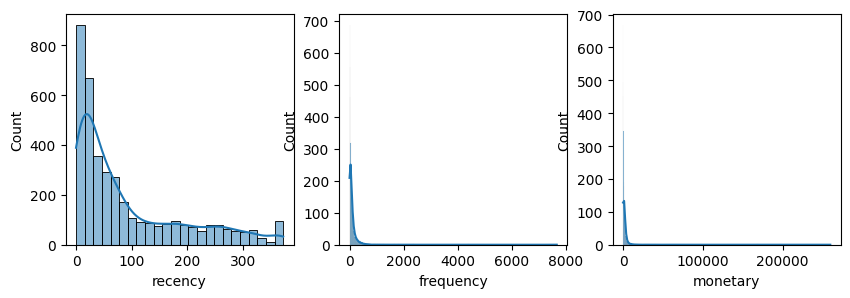

In [ ]:
# Plot distribution
plt.figure(figsize=(10,3))
plt.subplot(1,3, 1)
sns.histplot(rfm["recency"],kde=True)

plt.subplot(1,3, 2)
sns.histplot(rfm["frequency"],kde=True)

# Plot distribution of var3
plt.subplot(1,3, 3)
sns.histplot(rfm["monetary"],kde=True)

# Show the plot
plt.show()

from the plot we can conclude that,recency ,frequency and monetary all are skewed data.to make them we have to use transformer.

In [ ]:
from scipy.stats import yeojohnson

df = pd.DataFrame()
df["CustomerID"] = rfm.index

for col in ['recency', 'frequency', 'monetary']:
    y, lmbda = yeojohnson(rfm[col])
    df[col] = y

In [ ]:
df

,CustomerID,recency,frequency,monetary
0,12346.0,9.475473,0.694884,7.821438
1,12747.0,1.200002,4.723118,6.339685
2,12748.0,0.000000,8.651954,7.420215
3,12749.0,1.550289,5.400937,6.325301
4,12820.0,1.550289,4.155447,5.456073
...,...,...,...,...
3916,18280.0,9.082110,2.418768,4.367031
3917,18281.0,8.070398,2.095126,3.789792
3918,18282.0,2.462838,2.588841,4.359270
3919,18283.0,1.550289,6.740888,5.925850


In [ ]:
import sklearn.preprocessing as preproc

features = ['recency', 'frequency', 'monetary']
df[features] = preproc.StandardScaler().fit_transform(df[features])
df[:3]

,CustomerID,recency,frequency,monetary
0,12346.0,1.624067,-2.384191,3.285807
1,12747.0,-1.738877,0.741151,1.410045
2,12748.0,-2.226527,3.789375,2.777895


# Elbow method
this method helps up to define the number of clusters

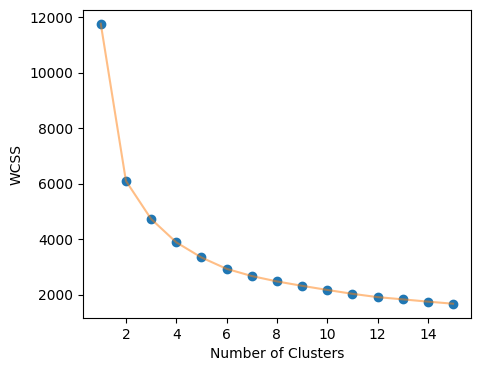

In [ ]:
# Let's find right fit for K
from sklearn.cluster import KMeans
import numpy as np
# Within Cluster Sum of Squared Errors (WCSS) 
wcss = []
max_range = 16
for i in range(1, max_range):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(df[features])
    wcss.append(km.inertia_)
    
plt.figure(1 , figsize = (5, 4))
plt.plot(np.arange(1 , max_range) , wcss , 'o')
plt.plot(np.arange(1 , max_range) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=1)

kmeans.fit(df[features])

rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [ ]:
rfm

,recency,frequency,monetary,recencyScore,frequencyScore,monetaryScore,rfm_score,rfm_score_sum,customer_type,cluster_labels
CustomerID,,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,Middle,1
12747.0,2,103,4196,1,1,1,111,3,Top,0
12748.0,0,4413,33053,1,1,1,111,3,Top,0
12749.0,3,199,4090,1,1,1,111,3,Top,0
12820.0,3,59,942,1,2,2,122,5,Top,0
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180,4,4,4,444,12,Low,2
18281.0,180,7,80,4,4,4,444,12,Low,2
18282.0,7,12,178,1,4,4,144,9,Middle,3


In [ ]:
y1=rfm.groupby('cluster_labels')['customer_type'].count()
y1

cluster_labels
0     903
1    1105
2    1026
3     887
Name: customer_type, dtype: int64

In [ ]:
rfm.groupby('cluster_labels')['recency','frequency','monetary'].mean()

,recency,frequency,monetary
cluster_labels,,,
0,12.603544,249.683278,5582.561462
1,87.728507,76.517647,1426.225339
2,218.208577,15.721248,281.930799
3,30.935738,26.021421,424.822999


<Axes: xlabel='cluster_labels', ylabel='count'>

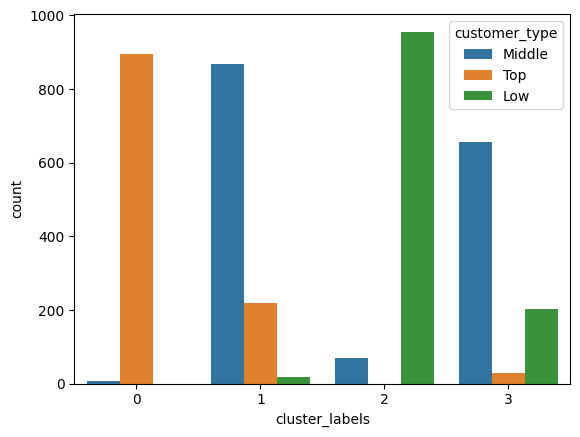

In [ ]:
sns.countplot(x='cluster_labels',hue='customer_type',data=rfm)


We have four clusters, or groups.
<br>
According to RFM, we have three types of customers: top, middle, and low. Normally, in business,we have to keep several aspects in mind, and these analyses help us take decisions easily. <br>

# Group-0: recency less,frequency and monetary are very high.so we consider them as top customers.<br>
If we want to give a special offer to our top customer,then we choose cluster or group 0. Most of the top customers lie in Group 0. <br>
<br>
# Group-1:recency and frequency are closer but monetary is very high 
means they did not make purchases frequently but purchased hugely.<br>
<br>
therefore,we conclude that,top customers lie in groups 0 and 1 respectively.
<br>
# Group-2: recency is huge but frequency and monetary are low
means These customers purchased recently, but they suddenly purchased a low amount. Group 2 has no top customers, so if we need to, we can exclude them from our analysis.<br>

# Group-3:recency and frequency are closer but monetary is very high 
If we try to find the middle customers whose rfm scores are so-so, then we choose clusters or groups 1 and 3.
<br>
Groups 1 & 3 are very close to each other, the only difference is that group 1's customers spend more money on their purchases than group 3.